- Eu recebi umas revisões do meu artigo e os revisores falaram bastante da temperatura durante os ciclos das baterias

- Então se a gente conseguisse pegar dados para 3 cenários diferentes, por exemplo, variando a temperatura, seria muito bom

- Nesses dados provavelmente a gente já vai ter os dados de decaimento da capacidade da célula com o passar dos ciclos

- Então o que a gente precisa é pegar esse gráfico, dividir a capacidade em cada ponto pela capacidade total, conseguindo assim o SOH com o passar dos ciclos

- E aí definir o que está sendo variado, por exemplo, seria bom ter esses dados pra **ciclos onde todas as variáveis permanecem constante, mas só a temperatura varia**

- Depois de conseguir esses gráficos, o resto é fácil

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

# Oxford

## Analise inicial

In [2]:
# Header: Date_Time,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Environment_Temperature (C),Cell_Temperature (C)

timeseries_df = pd.read_csv('Battery Archive Data/Oxford/OX_1-1_pouch_LCO_40C_0-100_2-1.84C_a_timeseries.csv')

# Cast de Date_Time para datetime
timeseries_df['Date_Time'] = pd.to_datetime(timeseries_df['Date_Time'])

# Remove Environment_Temperature (coluna com todos os valores nulos)
timeseries_df.drop(columns=['Environment_Temperature (C)'], inplace=True)

# Remove valores para Cell_Temperature < 5 (incorretos)
timeseries_df = timeseries_df[timeseries_df['Cell_Temperature (C)'] >= 5]

display(timeseries_df.head(10))
timeseries_df.info()

,Date_Time,Test_Time (s),Cycle_Index,Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Cell_Temperature (C)
0,2014-12-21 19:36:48.290,0.000,1.0,0.00,4.191,0.0,0.000,0.0,0.000,40.026
1,2014-12-21 19:36:49.290,0.999,1.0,-0.74,4.175,0.0,0.000,0.0,0.000,40.051
2,2014-12-21 19:36:50.290,1.999,1.0,-0.74,4.174,0.0,0.000,0.0,0.001,39.988
3,2014-12-21 19:36:51.290,2.999,1.0,-0.74,4.172,0.0,0.000,0.0,0.002,39.976
4,2014-12-21 19:36:52.290,3.999,1.0,-0.74,4.171,0.0,0.000,0.0,0.003,39.964
5,2014-12-21 19:36:53.290,4.999,1.0,-0.74,4.170,0.0,0.001,0.0,0.004,39.988
6,2014-12-21 19:36:54.290,5.999,1.0,-0.74,4.169,0.0,0.001,0.0,0.005,40.076
7,2014-12-21 19:36:55.290,6.999,1.0,-0.74,4.168,0.0,0.001,0.0,0.006,40.051
8,2014-12-21 19:36:56.290,7.999,1.0,-0.74,4.167,0.0,0.001,0.0,0.006,39.988
9,2014-12-21 19:36:57.290,8.999,1.0,-0.74,4.166,0.0,0.001,0.0,0.007,40.051


<class 'pandas.core.frame.DataFrame'>
Index: 453905 entries, 0 to 460380
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date_Time                453905 non-null  datetime64[ns]
 1   Test_Time (s)            453905 non-null  float64       
 2   Cycle_Index              453905 non-null  float64       
 3   Current (A)              453905 non-null  float64       
 4   Voltage (V)              453905 non-null  float64       
 5   Charge_Capacity (Ah)     453905 non-null  float64       
 6   Discharge_Capacity (Ah)  453905 non-null  float64       
 7   Charge_Energy (Wh)       453905 non-null  float64       
 8   Discharge_Energy (Wh)    453905 non-null  float64       
 9   Cell_Temperature (C)     453905 non-null  float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 38.1 MB


In [3]:
# Agrupa os dados pelo ciclo e calcula a média de cada coluna para cada ciclo
# reset_index() é usado para transformar o índice 'Cycle_Index' em uma coluna
df_cycle_grouped = timeseries_df.groupby('Cycle_Index').mean().reset_index()
display(df_cycle_grouped.head(10))

,Cycle_Index,Date_Time,Test_Time (s),Current (A),Voltage (V),Charge_Capacity (Ah),Discharge_Capacity (Ah),Charge_Energy (Wh),Discharge_Energy (Wh),Cell_Temperature (C)
0,1.0,2014-12-21 20:36:05.966848256,3.557676e+03,-0.010292,3.776287,0.177593,0.187761,0.657974,0.726990,40.236460
1,100.0,2014-12-29 00:34:23.598339840,6.226553e+05,-0.004987,3.784548,0.176536,0.181365,0.654524,0.703055,40.157538
2,200.0,2015-01-05 04:15:37.615726336,1.240729e+06,-0.002572,3.787886,0.175939,0.178406,0.652445,0.691989,40.155101
3,300.0,2015-01-13 19:57:39.148665088,1.988451e+06,-0.001616,3.789050,0.175449,0.176992,0.650689,0.686582,40.158961
4,400.0,2015-01-20 23:13:25.176679680,2.604997e+06,-0.002600,3.789231,0.174037,0.176504,0.645673,0.684703,40.147001
5,500.0,2015-01-28 02:17:17.378833920,3.220829e+06,-0.001852,3.790485,0.173394,0.175142,0.643434,0.679531,40.167829
6,600.0,2015-02-04 05:09:54.695768064,3.835986e+06,-0.001971,3.790971,0.172494,0.174346,0.640239,0.676452,40.137566
7,700.0,2015-02-11 19:56:17.979998976,4.493970e+06,-0.000879,3.791097,0.172390,0.173214,0.639972,0.671984,40.203200
8,800.0,2015-02-18 22:37:29.969228032,5.108442e+06,-0.002206,3.790775,0.171107,0.173164,0.635416,0.671713,40.218055
9,900.0,2015-02-26 01:08:40.272109824,5.722312e+06,-0.001996,3.791674,0.170285,0.172136,0.632542,0.667778,40.215620


Com o plot abaixo observa-se como as features do dataset variam com o passar do ciclo, o que permite exluir valores incorretos e verificar cada comportamento individualmente

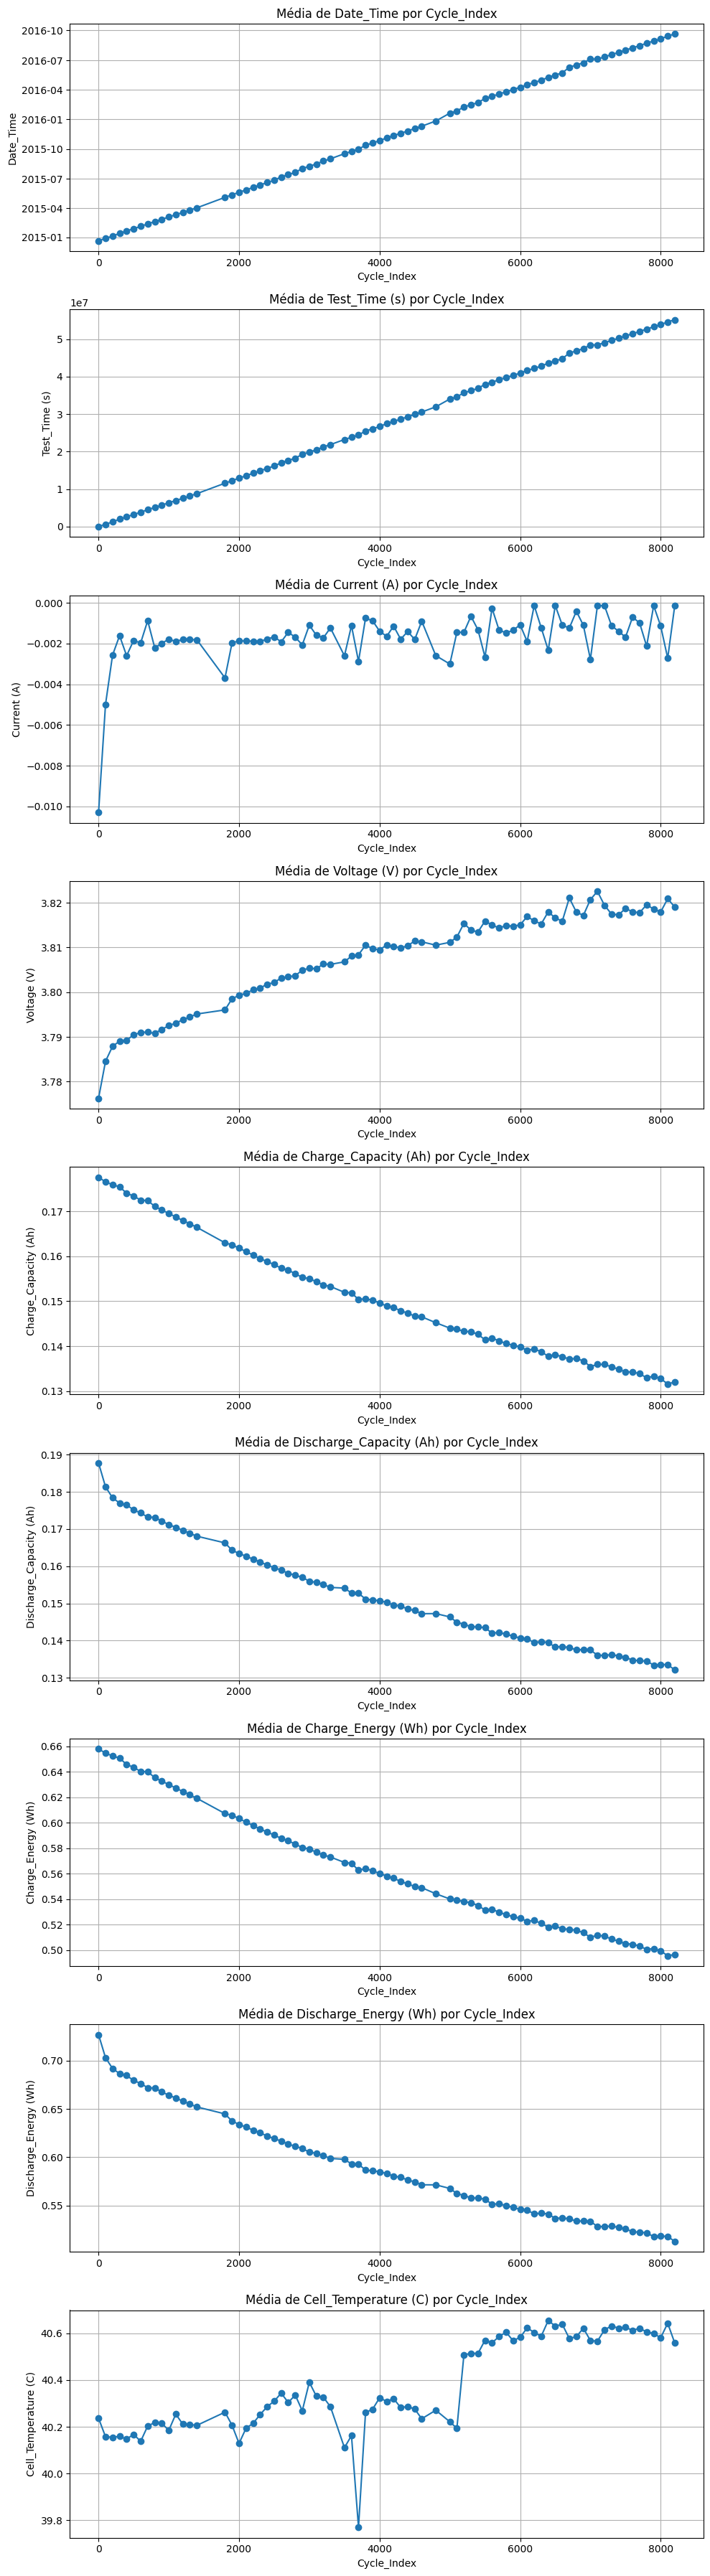

In [4]:
# Seleciona as colunas para plotar (exclui 'Cycle_Index')
columnsPlot = df_cycle_grouped.columns.drop('Cycle_Index')

# Cria um subplot para cada coluna
fig, axes = plt.subplots(nrows=len(columnsPlot), ncols=1, figsize=(10, 4*len(columnsPlot)))

for ax, col in zip(axes, columnsPlot):
    ax.plot(df_cycle_grouped['Cycle_Index'], df_cycle_grouped[col], marker='o')
    ax.set_title(f'Média de {col} por Cycle_Index')
    ax.set_xlabel('Cycle_Index')
    ax.set_ylabel(col)
    ax.grid(True)

plt.tight_layout()
plt.show()

## Busca por ciclos em que os valores dos parâmetros não variam (ou variam de forma desprezível) com excessão dos parâmetros de temperatura (`Cell_Temperature (C)`) e capacidade (`Charge_Capacity (Ah)` e `Discharge_Capacity (Ah)`)

- Para medir essa "variação", é possível adotar alguma medida de dispersão como desvio padrão ou variância. Ainda, é possível analisar o valor de variação bruta, ou seja, a distância do valor máximo para o mínimo
    - A variação bruta lidaria mal com outliers, então foi a escolida
    - **Desvio padrão foi escolhido** pois mede quanto os dados se afastam da média sem lidar com escala quadrática (caso da variância). Isso é especialmente importante já que estamos lidando com diferentes unidades e valores que podem ser pequenos (variância seria de ordem de grandeza ainda menor)

In [5]:
# Define as colunas que serão avaliadas para variação (excetuando as de temperatura e capacidade)
columnsToCheck = ['Current (A)', 'Voltage (V)', 'Charge_Energy (Wh)', 'Discharge_Energy (Wh)']

# Calcula o desvio padrão de cada ciclo para as colunas selecionadas
df_std = timeseries_df.groupby('Cycle_Index')[columnsToCheck].std().reset_index()
display(df_std.head(10))

,Cycle_Index,Current (A),Voltage (V),Charge_Energy (Wh),Discharge_Energy (Wh)
0,1.0,0.739928,0.237509,0.871754,0.917222
1,100.0,0.739983,0.224216,0.862173,0.892386
2,200.0,0.739996,0.220025,0.857206,0.880771
3,300.0,0.739998,0.218861,0.854060,0.874855
4,400.0,0.739995,0.219371,0.848332,0.871515
5,500.0,0.739998,0.218191,0.844704,0.865678
6,600.0,0.739997,0.217898,0.840605,0.861661
7,700.0,0.739999,0.218133,0.839281,0.856998
8,800.0,0.739997,0.219216,0.834455,0.855390
9,900.0,0.739997,0.218369,0.830471,0.850606


- O próximo passo importante é definir o que uma "variação desprezível", ou seja, quais valores em que, para cada variável, ter desvio padrão menor que esse é considerado desprezível
    - Para isso, conhecer os menores desvios padrão de cada variável pode ser útil

In [6]:
print('\nMenores valores de desvio padrão:')
print(df_std.min())
print('\nMaiores valores de desvio padrão:')
print(df_std.max())

# display de df_std sorted por cada coluna
print('\nSorted by Current (A):')
display(df_std.sort_values(by='Current (A)').head(5))

print('\nSorted by Voltage (V):')
display(df_std.sort_values(by='Voltage (V)').head(5))

print('\nSorted by Charge_Energy (Wh):')
display(df_std.sort_values(by='Charge_Energy (Wh)').head(5))

print('\nSorted by Discharge_Energy (Wh):')
display(df_std.sort_values(by='Discharge_Energy (Wh)').head(5))


Menores valores de desvio padrão:
Cycle_Index              1.000000
Current (A)              0.739928
Voltage (V)              0.194452
Charge_Energy (Wh)       0.649964
Discharge_Energy (Wh)    0.655181
dtype: float64

Maiores valores de desvio padrão:
Cycle_Index              8200.000000
Current (A)                 0.740000
Voltage (V)                 0.237509
Charge_Energy (Wh)          0.871754
Discharge_Energy (Wh)       0.917222
dtype: float64

Sorted by Current (A):


,Cycle_Index,Current (A),Voltage (V),Charge_Energy (Wh),Discharge_Energy (Wh)
0,1.0,0.739928,0.237509,0.871754,0.917222
1,100.0,0.739983,0.224216,0.862173,0.892386
15,1800.0,0.739991,0.215887,0.798346,0.820107
44,5000.0,0.739994,0.203661,0.709222,0.722956
33,3700.0,0.739994,0.205910,0.738963,0.754925



Sorted by Voltage (V):


,Cycle_Index,Current (A),Voltage (V),Charge_Energy (Wh),Discharge_Energy (Wh)
65,7100.0,0.740000,0.194452,0.669676,0.675049
61,6700.0,0.739999,0.195568,0.676305,0.684332
64,7000.0,0.739995,0.196488,0.669176,0.680049
75,8100.0,0.739995,0.197198,0.650394,0.660098
72,7800.0,0.739997,0.197875,0.656405,0.665292



Sorted by Charge_Energy (Wh):


,Cycle_Index,Current (A),Voltage (V),Charge_Energy (Wh),Discharge_Energy (Wh)
76,8200.0,0.740000,0.198482,0.649964,0.655181
75,8100.0,0.739995,0.197198,0.650394,0.660098
74,8000.0,0.739999,0.200184,0.654271,0.661591
73,7900.0,0.740000,0.199344,0.656171,0.661553
72,7800.0,0.739997,0.197875,0.656405,0.665292



Sorted by Discharge_Energy (Wh):


,Cycle_Index,Current (A),Voltage (V),Charge_Energy (Wh),Discharge_Energy (Wh)
76,8200.0,0.740000,0.198482,0.649964,0.655181
75,8100.0,0.739995,0.197198,0.650394,0.660098
73,7900.0,0.740000,0.199344,0.656171,0.661553
74,8000.0,0.739999,0.200184,0.654271,0.661591
72,7800.0,0.739997,0.197875,0.656405,0.665292


### 1. Uma possível forma de selecionar os ciclos de variação desprezível é com a adoção de thresholds:
- O threshold de cada varíavel foi definido inicialmente arrendondando para cima seus valores mínimos para três casas decimais
    - Alterações posteriores podem ser feitas para conseguir mais ou menos ciclos que se adequem
> OBS: Não tenho certeza de como poderia selecionar de uma forma boa cada valor de threshold 

In [7]:
# Definir o que é uma "variação desprezível" (threshold) para cada coluna
thresholds = {
    'Current (A)':           0.740,
    'Voltage (V)':           0.195,
    'Charge_Energy (Wh)':    0.650,
    'Discharge_Energy (Wh)': 0.656
}

# Função que verifica se todas as colunas de uma linha (ciclo) têm desvio padrão abaixo dos thresholds
def low_std(row):
    for column, threshold in thresholds.items():
        if row[column] >= threshold:
            return False
    return True

# Aplica a função para cada linha do DataFrame resultante
mask = df_std.apply(low_std, axis=1)

# Seleciona os índices dos ciclos que atendem ao critério
ciclos_baixa_variacao = df_std.loc[mask, 'Cycle_Index'].tolist()

print("Ciclos com baixa variação:", ciclos_baixa_variacao)


Ciclos com baixa variação: []


### 2. Outra forma de selecionar os ciclos de variação desprezível é selecionando as linhas com menor média de desvios padrão

In [8]:
# Cria um novo dataframe com o número do ciclo e a média dos desvios padrão calculada
df_std_mean = pd.DataFrame({
    'Cycle_Index': df_std['Cycle_Index'],
    'Media_Std': df_std[columnsToCheck].mean(axis=1)
})
display(df_std_mean.head(-10))

,Cycle_Index,Media_Std
0,1.0,0.691603
1,100.0,0.679689
2,200.0,0.674499
3,300.0,0.671943
4,400.0,0.669804
...,...,...
62,6800.0,0.574030
63,6900.0,0.573657
64,7000.0,0.571427
65,7100.0,0.569794


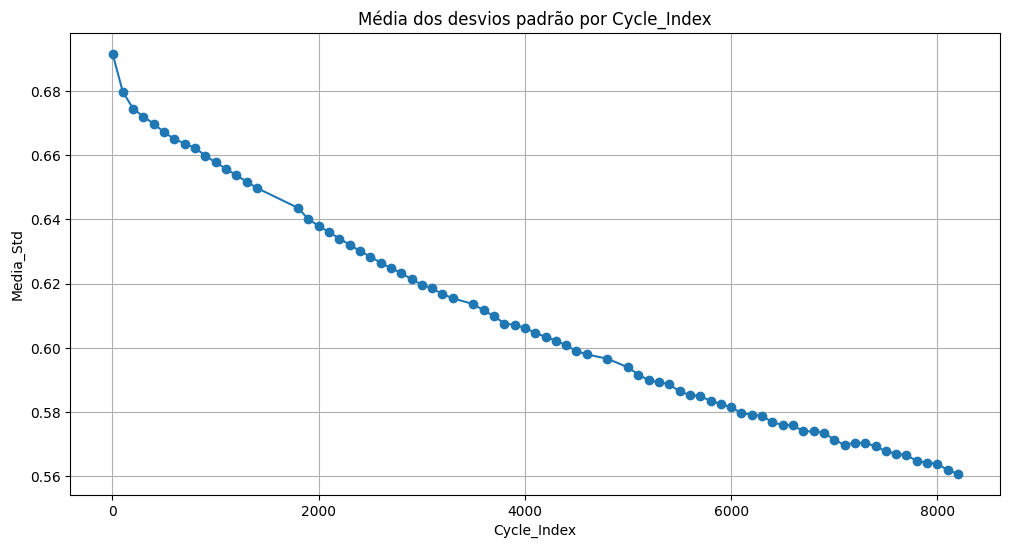


20 ciclos com menor média de desvio padrão:


,Cycle_Index,Media_Std
76,8200.0,0.560907
75,8100.0,0.561921
74,8000.0,0.564011
73,7900.0,0.564267
72,7800.0,0.564892
71,7700.0,0.566585
70,7600.0,0.567146
69,7500.0,0.567789
68,7400.0,0.569460
65,7100.0,0.569794


In [9]:
# Ajusta o tamanho da figura para ser mais larga
plt.figure(figsize=(12, 6))

# Plot da média dos desvios padrão por ciclo
plt.plot(df_std_mean['Cycle_Index'], df_std_mean['Media_Std'], marker='o')
plt.title('Média dos desvios padrão por Cycle_Index')
plt.xlabel('Cycle_Index')
plt.ylabel('Media_Std')
plt.grid(True)
plt.show()

# Mostra os N ciclos com menor média de desvio padrão
N = 20
print(f'\n{N} ciclos com menor média de desvio padrão:')
display(df_std_mean.sort_values(by='Media_Std').head(N))

- Observa-se que, selecionando dessa forma, os parametros ficam mais constantes na medida em que o numero de ciclos aumenta

## Ciclos selecionados

A partir daqui, supõe-se que os outros parâmetros são constantes e apenas a temperatura (`Cell_Temperature (C)`) e as capacidades (`Charge_Capacity (Ah)` e `Discharge_Capacity (Ah)`) variam nos ciclos selecionados.
- Dessa forma, podemos relacionar a variação de SOH com a temperatura

In [10]:
# Seleciona-se os N ciclos com menor média de desvio padrão
selected_cycles = df_std_mean.sort_values(by='Media_Std')['Cycle_Index'].head(N).tolist()

# Cast para inteiros e sort
selected_cycles = [int(cycle) for cycle in selected_cycles]
selected_cycles.sort()

print(f'\nCiclos selecionados: {selected_cycles}')



Ciclos selecionados: [6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200]


In [11]:
# Selecionar apenas as linhas em que o 'Cycle_Index' está na lista de ciclos selecionados
selected_cycles_df = df_cycle_grouped[df_cycle_grouped['Cycle_Index'].isin(selected_cycles)]  

# Selecionar apenas as colunas de interesse
selected_cycles_df = selected_cycles_df[['Cycle_Index', 'Cell_Temperature (C)', 'Charge_Capacity (Ah)', 'Discharge_Capacity (Ah)']]

# Resetar o índice
selected_cycles_df = selected_cycles_df.reset_index(drop=True)

display(selected_cycles_df.head(10))

,Cycle_Index,Cell_Temperature (C),Charge_Capacity (Ah),Discharge_Capacity (Ah)
0,6300.0,40.587840,0.138756,0.139686
1,6400.0,40.655339,0.137730,0.139480
2,6500.0,40.631228,0.138139,0.138247
3,6600.0,40.638930,0.137600,0.138427
4,6700.0,40.578207,0.137164,0.138093
5,6800.0,40.586166,0.137214,0.137528
6,6900.0,40.622104,0.136727,0.137553
7,7000.0,40.569520,0.135444,0.137502
8,7100.0,40.566512,0.135929,0.136038
9,7200.0,40.615457,0.135929,0.136038


### Plot do decaimento das capacidades no decorrer dos ciclos

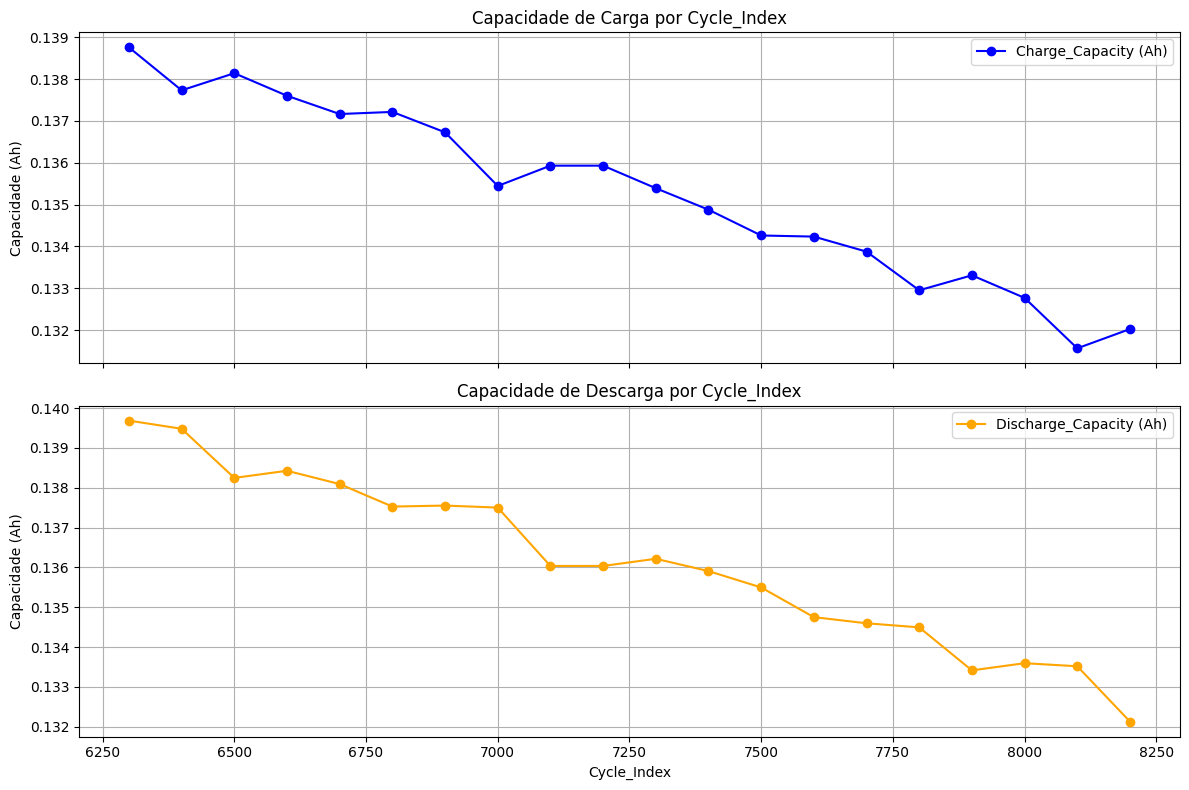

In [12]:
# Criar a figura e os subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

# Plot da capacidade de carga
axes[0].plot(selected_cycles_df['Cycle_Index'], selected_cycles_df['Charge_Capacity (Ah)'], marker='o', color='blue', label='Charge_Capacity (Ah)')
axes[0].set_title('Capacidade de Carga por Cycle_Index')
axes[0].set_ylabel('Capacidade (Ah)')
axes[0].legend()
axes[0].grid(True)

# Plot da capacidade de descarga
axes[1].plot(selected_cycles_df['Cycle_Index'], selected_cycles_df['Discharge_Capacity (Ah)'], marker='o', color='orange', label='Discharge_Capacity (Ah)')
axes[1].set_title('Capacidade de Descarga por Cycle_Index')
axes[1].set_xlabel('Cycle_Index')
axes[1].set_ylabel('Capacidade (Ah)')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


### Plot do SOH no decorrer dos ciclos

$$
\text{SOH} = \frac{\text{capacidade\_atual}}{\text{capacidade\_inicial}}
$$

In [13]:
# Definir os valores de capacidade total
capacidade_total_charge    = 0.138756
capacidade_total_discharge = 0.139686

# Normalizar os valores
selected_cycles_df['SOH_charge'] = selected_cycles_df['Charge_Capacity (Ah)'] / capacidade_total_charge
selected_cycles_df['SOH_discharge'] = selected_cycles_df['Discharge_Capacity (Ah)'] / capacidade_total_discharge
display(selected_cycles_df.head(10))

,Cycle_Index,Cell_Temperature (C),Charge_Capacity (Ah),Discharge_Capacity (Ah),SOH_charge,SOH_discharge
0,6300.0,40.587840,0.138756,0.139686,1.000003,0.999997
1,6400.0,40.655339,0.137730,0.139480,0.992607,0.998527
2,6500.0,40.631228,0.138139,0.138247,0.995555,0.989700
3,6600.0,40.638930,0.137600,0.138427,0.991671,0.990985
4,6700.0,40.578207,0.137164,0.138093,0.988524,0.988593
5,6800.0,40.586166,0.137214,0.137528,0.988888,0.984548
6,6900.0,40.622104,0.136727,0.137553,0.985374,0.984730
7,7000.0,40.569520,0.135444,0.137502,0.976131,0.984367
8,7100.0,40.566512,0.135929,0.136038,0.979629,0.973881
9,7200.0,40.615457,0.135929,0.136038,0.979629,0.973884


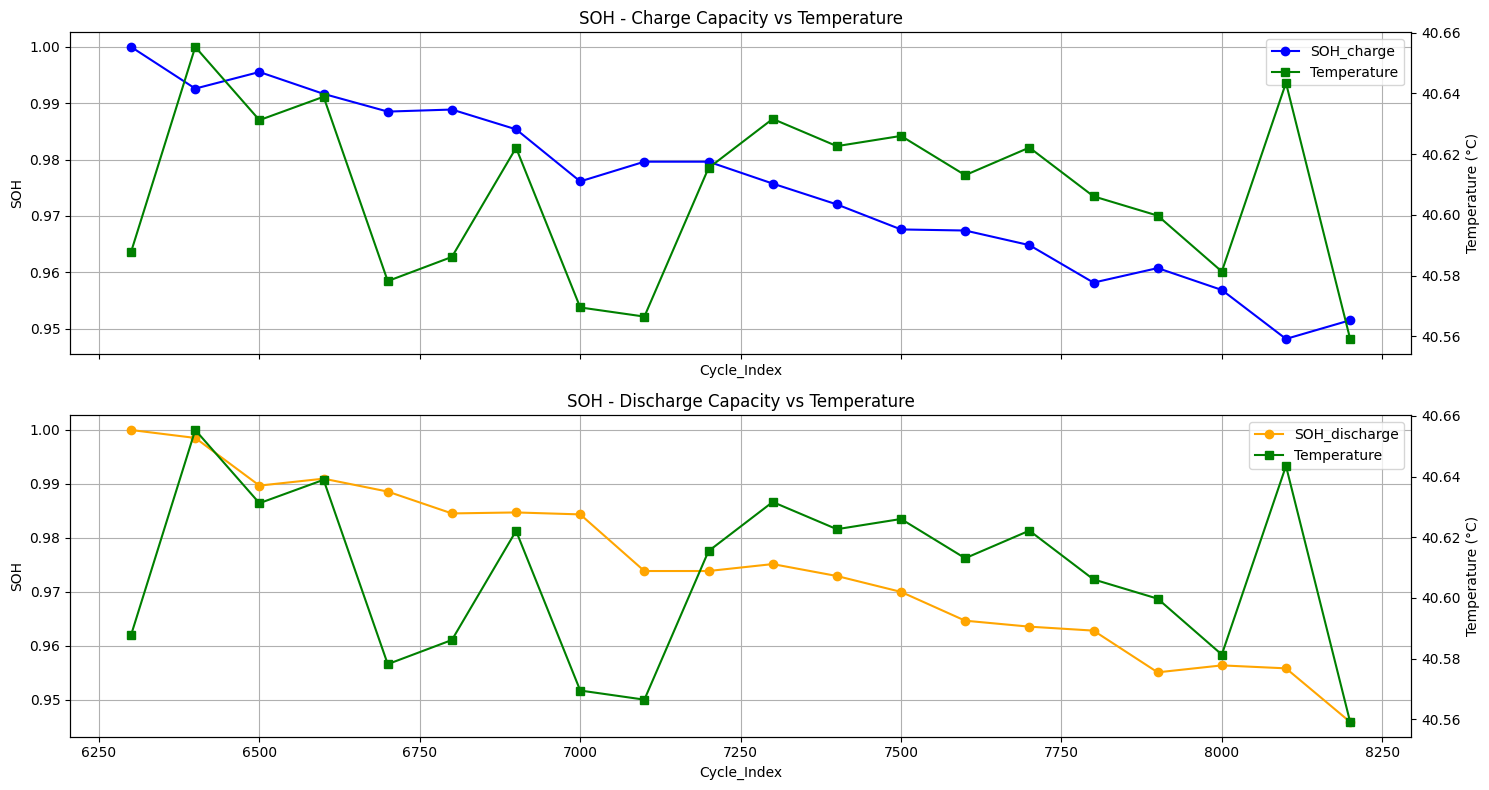

In [ ]:
import matplotlib.pyplot as plt

# Criar a figura e os subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8), sharex=True)

ax1 = axes[0]
ax2 = ax1.twinx()  # Criar um segundo eixo y

l1, = ax1.plot(selected_cycles_df['Cycle_Index'], selected_cycles_df['SOH_charge'], marker='o', color='b', label='SOH_charge')
l2, = ax2.plot(selected_cycles_df['Cycle_Index'], selected_cycles_df['Cell_Temperature (C)'], marker='s', color='g', label='Temperature')

ax1.set_title('SOH - Charge Capacity vs Temperature')
ax1.set_xlabel('Cycle_Index')
ax1.set_ylabel('SOH')
ax2.set_ylabel('Temperature (°C)')
ax1.grid(True)

# Criar legenda combinada
ax1.legend(handles=[l1, l2], loc='upper right')

# ----------------------------

ax3 = axes[1]
ax4 = ax3.twinx()  # Criar um segundo eixo y

l3, = ax3.plot(selected_cycles_df['Cycle_Index'], selected_cycles_df['SOH_discharge'], marker='o', color='orange', label='SOH_discharge')
l4, = ax4.plot(selected_cycles_df['Cycle_Index'], selected_cycles_df['Cell_Temperature (C)'], marker='s', color='g', label='Temperature')

ax3.set_title('SOH - Discharge Capacity vs Temperature')
ax3.set_xlabel('Cycle_Index')
ax3.set_ylabel('SOH')
ax4.set_ylabel('Temperature (°C)')
ax3.grid(True)

# Criar legenda combinada
ax3.legend(handles=[l3, l4], loc='upper right')

# Ajustar layout
plt.tight_layout()
plt.show()